**Название проекта: Анализ индустрии компьютерных игр для интернет-магазина «Стримчик»**

## Введение

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Задачи исследования** - проанализировать данные, провести расчеты, составить портрет пользователя по регионам, проверить гипотезы.

**Цель исследования** - на основе полученных результатов выявить определяющие успешность игры закономерности, что позволит интернет-магазину «Стримчик» в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Данные для анализа** – исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, доступные из открытых источников.

**Описание данных**
* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

---
**Этапы работы над проектом**

*Шаг 1.* Загрузка данных

*Шаг 2.* Подготовка данных:    
* работа с наименованиями столбцов  
* обработка пропусков  
* преобразование данных в нужные типы  
* создание нового столбца с данными о суммарных продажах

*Шаг 3.* Исследовательский анализ данных:  
* анализ количества выпущенных игр по годам  
* анализ количества продаж по платформам - суммарных и распределения по годам, изучение жизненного цикла платформы  
* определение актуального периода для исследования  
* анализ продаж по платформам за актуальный период, выбор потенциально прибыльных платформ  
* построение и анализ диаграммы размаха по продажам в разбивке по платформам  
* анализ взаимосвязи между продажами и оценками (критиков и пользователй)  
* анализ общего распределения игр по жанрам

*Шаг 4.* Составление портрета пользователя по регионам

*Шаг 5.* Проверка гипотез (проверка гипотез, выводы)

*Шаг 6.* Общий вывод (результаты исследования, рекомендации)

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt, factorial
from scipy import stats as st
from scipy.stats import binom, poisson, norm

В целях оптимизации кода создадим функцию *check_df*, которая будет выводить первые 5 строк набора данных, общую информацию о датафрейме и наименования столбцов:

In [125]:
def check_df (df):
    display(df.head())  
    display(df.info()) 
    display(df.columns) 

## Шаг 1. Загрузка данных

### Считаем и сохраним данные

Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм data:

In [126]:
data = pd.read_csv('/datasets/games.csv')

### Изучение общей информации

In [127]:
check_df (data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Итак, в предоставленной выборке содержится: 16715 строк (количество компьютерных игр), 11 столбцов (каждый столбец - параметр, который описывает игру).

Описание каждой компьютерной игры включает в себя 11 параметров:

**Name** - название игры  
**Platform** - платформа  
**Year_of_Release** - год выпуска  
**Genre** - жанр игры  
**NA_sales** - продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** - продажи в Европе (миллионы проданных копий)  
**JP_sales** - продажи в Японии (миллионы проданных копий)  
**Other_sales** - продажи в других странах (миллионы проданных копий)  
**Critic_Score** - оценка критиков (максимум 100)  
**User_Score** - оценка пользователей (максимум 10)  
**Rating** - рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

---
ESRB (Entertainment Software Rating Board) — это ассоциация, которая оценивает игровой контент и присваивает ему подходящую возрастную категорию. Приведем небольшую справочную информацию, которая в дальнейшем пригодится для анализа.

Согласно рейтингу ESRB, существуют следующие категории:

**«EC»** («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими, как правило, это развивающие игры

**«E»** («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. **Отметим, что категория «E» изначально называлась «K-A» ("Kids to Adults"). Название категории изменилось в 1998.**

**«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови

**«T»** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

**«M»** («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику

**«AO»** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

**«RP»** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

**«RP 17+»** («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

---
Все наименования столбцов корректны, но для удобства приведем их к нижнему регистру (на следующем этапе).

В данных столбцах пропусков нет, значения указаны в корректном формате (оставим без изменений):
 
* Platform
* NA_sales  
* EU_sales        
* JP_sales        
* Other_sales 

В некоторых столбцах есть пропуски и некорректный тип данных:

* Name (есть пропуски)
* Year_of_Release (есть пропуски, тип данных некорректый)
* Genre (есть пропуски)
* Critic_Score (есть пропуски)
* User_Score (есть пропуски, тип данных некорректый)
* Rating (есть пропуски)

---
Далее рассмотрим некорректные типы данных и пропущенные значения. В случаях, где это возможно, произведем замену пропусков. Также преобразуем тип данных в тех столбцах, где это необходимо.



## Шаг 2. Подготовка данных

### Работа с наименованиями столбцов

Как уже было отмечено ранее, все названия столбцов корректны, но для удобства приведем их к нижнему регистру:

In [128]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

#### Удаление пропущенных значений

Рассмотрим столбцы с пропусками, которые были выявлены на предыдущем этапе.  
Узнаем, сколько всего пропущенных значений в данных столбцах:

In [129]:
data['name'].isna().sum() # количество пропусков в столбце 'name'

2

In [130]:
data['year_of_release'].isna().sum() # количество пропусков в столбце 'year_of_release'

269

In [131]:
data['genre'].isna().sum() # количество пропусков в столбце 'genre'

2

In [132]:
data['critic_score'].isna().sum() # количество пропусков в столбце 'critic_score'

8578

In [133]:
data['user_score'].isna().sum() # количество пропусков в столбце 'user_score'

6701

In [134]:
data['rating'].isna().sum() # количество пропусков в столбце 'rating'

6766

Помимо абсолютных значений рассмотрим также, какой процент составляют пропущенные значения в каждом столбце от всего датафрейма:

In [135]:
pd.DataFrame(round(data.isna().mean()*100,1)).T

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0.0,0.0,1.6,0.0,0.0,0.0,0.0,0.0,51.3,40.1,40.5


1) Итак, количество строк с пропусками в столбцах **'name' (название игры), 'year_of_release' (год выпуска), 'genre' (жанр игры)** незначительно (количество от всего датафрейма составляет 0 %, 1.6 % и 0 % соответственно). Логичную замену предложить не представляется возможным, поэтому оптимальным решением будет удалить эти строки:

Так как мы работаем с продажами, кроме процента потерь следует рассмотреть и сами значения количества продаж. Проверим, какое количество продаж ('na_sales', 'eu_sales', 'jp_sales', 'other_sales') принесли игры, описание которых содержится в строках с пропусками. Если эти игры - лидеры по количеству проданных копий, то удалив эти строки, мы рискуем получить искаженные результаты.

Найдем информацию о продажах во всем датафрейме, после чего сравним информацию о количестве продаж в сроках с пропусками с соответствующими данными по всему датафрейму.

In [136]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Рассмотрим строки с пропусками в столбцах 'name' и 'genre':

In [137]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [138]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, это одни и те же строки в столбцах 'name' и 'genre'. Так как по всем регионам количество продаж находится очень далеко от максимального и достаточно близко к средним и медианным значениям всего датафрейма, можем удалить эти две строки.

Удалив 2 строки с пропусками в столбце 'name', мы удалим 2 строки с пропусками в столбце 'genre' (отдельно в столбце 'genre' удалять пропущенные значения не нужно).

In [139]:
data.dropna(subset = ['name'], inplace = True) # удаляем строки с пропусками в столбцах 'name'

Аналогичная ситуация с пропусками в столбце 'year_of_release'. Так как количество строк с пропусками относительно большое (269), отдельно рассматривать каждую строку мы не будем, выведем общую информацию по всем строкам:

In [140]:
data[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


Так как по всем регионам показатели находится очень далеко от максимального и достаточно близко к средним и медианным показателями всего датафрейма, можем удалить эти строки:

In [141]:
data.dropna(subset = ['year_of_release'], inplace = True) # удаляем строки с пропусками в столбце 'year_of_release' 

2) Заменить значения параметров **'critic_score' (оценка критиков), 'user_score' (оценка пользователей)** также не представляется возможным. Каждая запись в датафрейме относится к определенной игре, которая не взаимосвязана с остальными, поэтому заполнение средним или медианным значением по жанру/году/платформе может значительно исказить изначальные распределения данных величин.

Количество строк с пропусками в столбцах 'critic_score', 'user_score' значительное (51.3 %, 40.1 % соответственно) и в случае удаления этих строк мы потеряем большой объем данных, что также повлияет на результаты исследования.

Таким образом, оптимальное решение - оставить пропущенные значения в данных столбцах.

3) Рассмотрим строки с пропусками в столбце **'rating' (рейтинг от организации ESRB)**:

Количество строк с пропусками значительное (40.5 %) и в случае удаления этих строк мы потеряем большой объем данных, что повлияет на результаты исследования. 

Осставить пропущенные значения будет некорректным решением, т.к. записи с пропусками не учитываются при группировке данных, и в этом случае мы не сможем выявить реальный портрет игрока.

Рассмотрим, какие уникальные категории содержатся в столбце 'rating':

In [142]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [143]:
len(data['rating'].unique())

9

---
Рассмотрим категорию «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Фактически, к этой категории относятся все строки с NaN в столбце 'rating': и «RP» и Nan - означает, что игра без рейтинга.

Таким образом, оптимальным решением будет заменить пропущенные значения в столбце 'rating' на «RP»:

In [144]:
len(data.query('rating == "RP"')) # количество строк со значением «RP» в столбце 'rating' до замены

1

In [145]:
data['rating'].fillna('RP', inplace=True) # заменили пропуски в столбце 'rating' на «RP»

In [146]:
len(data.query('rating == "RP"')) # количество строк со значением «RP» в столбце 'rating' после замены

6677

---
Также заметим, что среди значений одновременно присутствуют категории «K-A» и «E». Как уже было сказано ранее (см. п.2.2), категория «E» изначально называлась «K-A» (название изменилось в 1998). Поэтому, фактически это одна категория и будет логичным заменить все значения «K-A» на «E»:

In [147]:
data['rating'] = data['rating'].str.replace('K-A', 'E') # заменили значения «K-A» в столбце 'rating' на «E»

---
Итак, в столбце 'rating' мы полностью избавились от пропусков и сократили количество категорий :

In [148]:
data['rating'].isna().sum() # количество пропусков в столбце 'rating' после всех действий

0

In [149]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [150]:
# check
data['rating'].value_counts()

RP      6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

#### Значения 'tbd' в столбце'user_score'

Рассмотрим отдельно столбец 'user_score' (оценка пользователей). Помимо пропусков NaN и вещественных числел до 10, в столбце содержатся значения 'tbd':

In [151]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [152]:
len(data['user_score'].unique())

97

In [153]:
len(data.query('user_score == "tbd"'))

2376

In [154]:
round(len(data.query('user_score == "tbd"')) / len(data), 2)

0.14

Количество строк, в которых в столбце 'user_score' содержится значение 'tbd' - 2376, что составляет 0.14 % от всего датафрейма.

TBD — это аббревиатура, которая расшифровывается как «To Be Determined» (будет определено).
Согласно информации от FAQ Metacritic (англоязычный сайт-агрегатор, собирающий отзывы о музыкальных альбомах, играх, фильмах, телевизионных шоу, DVD-дисках и мобильных играх), эту аббревиатуру используют тогда, когда игра имеет недостаточное количество отзывов для подсчета рейтинга пользователей и его публикации (менее 4 отзыва).

Вероятно, с такой ситуацией можно столкнуться при анализе игр, которые не пользуются популярностью, а также при анализе игр, чья основная аудитория не владеет английским (и соответственно, не оставляет свои отзывы на мировых сайтах, таких как Metacritic).

Таким образом, фактически 'tbd' является NaN, произведем замену всех значений 'tbd' в столбце 'user_score' на NaN:

In [155]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [156]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [157]:
len(data.query('user_score == "tbd"'))

0

---
Итак, мы провели работу с пропущенными значениями: 

* удалили строки с пропусками в столбцах 'name', 'year_of_release', 'genre' (271 строка / 1,62 % от всего датафрейма) т.к. логичную замену предложить невозможно, а количество строк оказалось несущественным (после удаления в датафрейме осталось 16444 строк)
* в столбцах 'critic_score', 'user_score' пропущенные значения оставили, т.к. логичную замену предложить невозможно, а количество строк с пропусками значительное, и удаление может сильно повлиять на результаты
* в столбце 'rating' заменили пропущенные значения на «RP» т.к. фактически и «RP» и Nan означает, что игра без рейтинга; также в столбце 'rating' объединили категории 'K-A' и 'E' в 'E' т.к. это одна категория, название которой менялось
* в столбце 'user_score' произвели замену всех значений 'tbd' на NaN (2376 строк / 0,14 % от всего датафрейма), т.к. выяснили, что 'tbd' фактически является NaN

In [158]:
check_df (data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Причины появления пропусков

Для того, чтобы предположить, с чем связаны те или иные пропуски в данных, было бы целесообразно предварительно уточнить у коллег или заказчика, каким образом собирались данные для анализа. На текущий момент все, что нам известно - это то, что исторические данные о продажах игр и их характеристики доступны "из открытых источников".

Одна из возможных причин - это человеческий фактор (данные не были получены / не были внесены оператором). В столбцах 'name' и 'genre' - очень мало пропусков, кроме того, как мы выяснили ранее, это одни и те же строки (две строки с пропусками в двух столбцах). Вполне вероятно, что пропуски в этих столбцах связаны с ошибкой оператора.

Можно предположить, что на этапе сбора данных по некоторым играм не было полной информации и значения оставили пустыми (например, столбцы 'year_of_release', 'rating'). Возможная причина пропусков в столбцах c оценками 'critic_score' и 'user_score' - это отсутствие достаточного количества отзывов (только вместо 'tbd' оставили пропуск).

Также нельзя исключать и технологический фактор появления пропусков (сбои или неполадки в работе ПО при выгрузке и внесении данных в базу, при переносе данных, а также обновление ПО).

### Преобразование данных в нужные типы

В столбце 'year_of_release' (год выпуска) указан некорректный тип данных float64, логичным будет перевести эти значения в формат datetime (год - это целое число, значение будет преобразовано в формат int64):

In [159]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y', errors = 'coerce').dt.year

В столбце 'user_score' (оценка пользователей) также указан некорректный тип данных object, значения оценки пользователей - это вещественные числа до 10, переведем в float64:

In [160]:
data['user_score'] = data['user_score'].astype('float64')

### Проверка на дубликаты:

In [161]:
data.duplicated().sum() # проверка на явные дубликаты

0

В рассматриваемой выборке явных дубликатов нет.

Проверим наличие неполных дубликатов - строки будут дубликатами, если совпадут значения одновременно в трех столбцах: 'name', 'platform', 'year_of_release' (остальные значения также предположительно должны совпасть, в противном случае данные некорректны).

Cодержимое столбцов с категориальными переменными ('name', 'platform'), по которым будем производить поиск дубликатов, приведем к нижнему регистру:

In [162]:
# уникальные значения столбцов 'name', 'platform' до изменений 
display(data['name'].unique())
display(data['platform'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [163]:
# проводим содержимое столбцов 'name', 'platform' к нижнему регистру 
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()

In [164]:
# уникальные значения столбцов 'name', 'platform' после изменений 
display(data['name'].unique())
display(data['platform'].unique())

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [165]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() # количество дубликатов

1

In [166]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)] # выведем все строки-дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Очевидно, что это дубликаты, но заметим, что отличаются данные по продажам в регионах (столбцы 'na_sales', 'eu_sales', 'other_sales'). Так как в строке с индексом 16230 значения продаж в основном нулевые, можно предположить, что по этой строке данные были заполнены некорректно. Возможная причина - отсутствие информации о количестве продаж.

Так им образом, из дальнейшего рассмотрения удалим строку с индексом 16230 как дубликат:

In [167]:
data = data.drop(index=16230)

In [168]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() # проверим количество дубликатов после удаления

0

Итак, в результате проверки на дубликаты был удален один дубликат.

### Расчет суммарных продаж во всех регионах

В датафрейме data создадим новый столбец 'sum_sales' в котором посчитаем суммарные продажи во всех регионах. Значения в этом столбце будут в миллионах проданных копий (как и в столбцах с продажами по регионам).

In [169]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [170]:
check_df(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


None

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales'],
      dtype='object')

---
Итак, на этом шаге мы следали следующее: 

* привели названия столбцов  к нижнему регистру (для удобства)

* провели работу с пропущенными значениями:  
    - удалили строки с пропусками в столбцах 'name', 'year_of_release', 'genre' (271 строка / 1,62 % от всего датафрейма) т.к. логичную замену предложить невозможно, а количество строк оказалось несущественным (после удаления в датафрейме осталось 16444 строк)  
    - в столбцах 'critic_score', 'user_score' пропущенные значения оставили, т.к. логичную замену предложить невозможно, а количество строк с пропусками значительное, и удаление может сильно повлиять на результаты
    - в столбце 'rating' заменили пропущенные значения на «RP» т.к. фактически и «RP» и Nan означает, что игра без рейтинга; также в столбце 'rating' объединили категории 'K-A' и 'E' в 'E' т.к. это одна категория, название которой менялось
    - в столбце 'user_score' произвели замену всех значений 'tbd' на NaN (2376 строк / 0,14 % от всего датафрейма), т.к. выяснили, что 'tbd' фактически является NaN
    - предположили возможные причины появления пропусков (человеческий фактор, отсутствие полной информации, технологический фактор)

* привели данные к корректному типу - столбец 'year_of_release' (год выпуска) преобразовали в формат int64; 'user_score' (оценка пользователей) перевели в float64:

* провели работу с дубликатами - был удален один дубликат

* создали новый столбец 'sum_sales', в котором рассчитали суммарные продажи во всех регионах 

Таким образом, данные готовы к дальнейшему анализу.

## Шаг 3. Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Рассмотрим количество игр, которое суммарно выпускалось на всех платформах за каждый год. 

In [171]:
data_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
data_years.columns = ['count']
display(data_years.head(19).T)
display(data_years.tail(18).T)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
count,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379


year_of_release,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,652,544,581,606,502


In [172]:
min(data_years.index)

1980

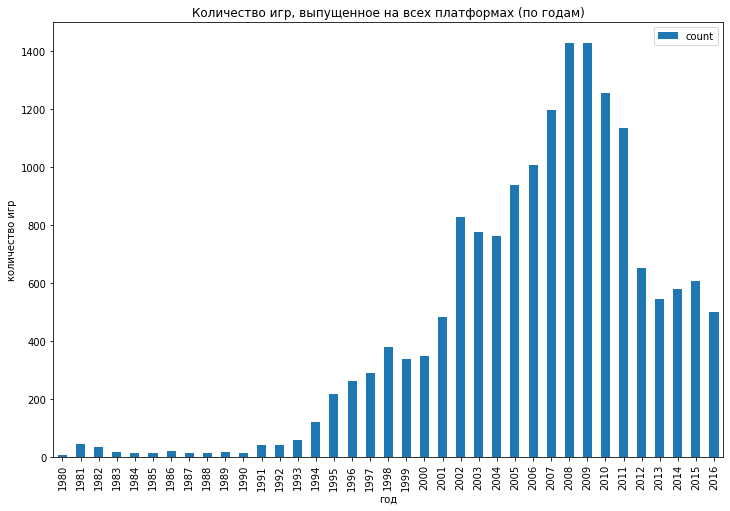

In [173]:
data_years.plot(y='count', kind='bar', figsize=(12, 8))
plt.title('Количество игр, выпущенное на всех платформах (по годам)')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show();

Отсортируем данные по годам в порядке убывания:

In [174]:
display(data_years.sort_values('count', ascending=False).head(19).T)
display(data_years.sort_values('count', ascending=False).tail(18).T)

year_of_release,2008,2009,2010,2007,2011,2006,2005,2002,2003,2004,2012,2015,2014,2013,2016,2001,1998,2000,1999
count,1427,1426,1255,1197,1136,1006,939,829,775,762,652,606,581,544,502,482,379,350,338


year_of_release,1997,1996,1995,1994,1993,1981,1992,1991,1982,1986,1989,1983,1990,1987,1988,1985,1984,1980
count,289,263,219,121,60,46,43,41,36,21,17,17,16,16,15,14,14,9


За рассматриваемый временной промежуток 1980-2008 меньше всего игр было выпущено в 1980 (всего 9), максимальное количество выпущенных игр - в 2008 (1427).

Заметим, что за период с 1980 по 1993 на всех платформах суммарно выпускалось меньше 100 игр, а начиная с 2006 - уже больше 1000. 

До 1993 года игр практически не было, тренд на увеличение их количества пришел вместе с технологическим прорывом: созданием Pentium 1 в 1993 и развитием языков программирования. Начиная с 1994 начинает появляться все больше игр - сначала на MS-DOS, затем на Windows. Можно заметить резкий скачок количества выпущенных игр в 2002 и пик в 2008-2009. 

С 2010 мы видим спад, который предположительно можно связать с развитием мобильных устройств. В это время начинают набирать популярность социальные сети и снижается интерес к играм, соответственно выпуск новых игр также сокращается. Также есть вероятность, что на снижение выпуска новых игр оказал влияние мировой экономический кризис (2008-2013). Помимо того, изменились требования к игре - с развитием технологий появились возможности создавать более качественный продукт с новым геймплеем и графикой, но процесс создания новой игры стал более длительным.

---
Можно сделать вывод, что данные по всем периодам не важны. Из рассмотрения можно исключить период до 1994 года, когда количество выпущенных игр было совсем небольшим (меньше 100).

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Проанализируем, как менялись продажи по платформам (данные выведем в порядке убывания):

In [175]:
data_platform = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
display(data_platform.sort_values('sum_sales', ascending=False).head(16).T)
display(data_platform.sort_values('sum_sales', ascending=False).tail(15).T)

platform,ps2,x360,ps3,wii,ds,ps,ps4,gba,psp,3ds,pc,gb,xb,nes,n64,snes
sum_sales,1233.56,961.24,931.33,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04


platform,gc,xone,2600,wiiu,psv,sat,gen,dc,scd,ng,ws,tg16,3do,gg,pcfx
sum_sales,196.73,159.32,86.48,82.19,53.81,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


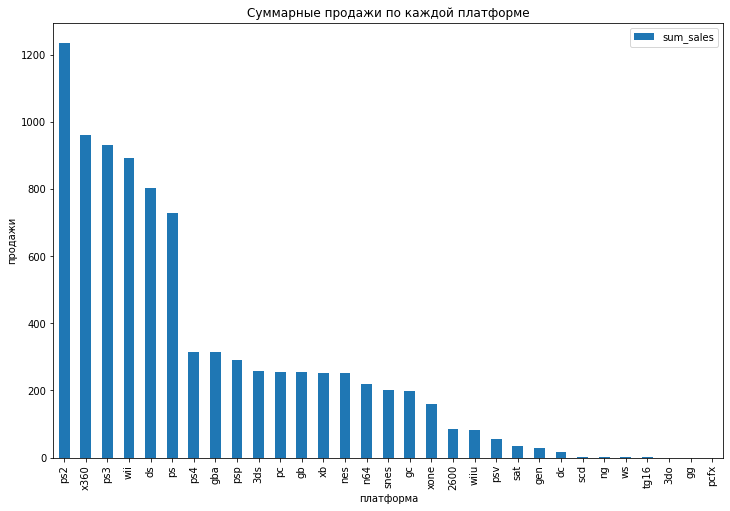

In [176]:
data_platform.sort_values('sum_sales', ascending=False).plot(y='sum_sales', kind='bar', figsize=(12, 8))
plt.title('Суммарные продажи по каждой платформе')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show();

С большим отрывом лидирует платформа PS2 (1233.56 млн проданных копий). Далее, сильно опережая по продажам остальные платформы, идут X360, PS3, Wii, DS, PS (961.24-727.58 млн). На следующем месте с большим отрывом - платформа PS4 (314.14 млн). Самые редкие платформы - представители японских технологий. Меньше всего продаж - у платформы PCFX (всего 30 000 проданных копий).

---
С учетом того, что по количеству продаж 6-е место (PS) расположено довольно близко к 5-му (DS) и первые 6 платформ значительно опережают все остальные, для дальнейшего рассмотрения выберем топ-6 платформ: PS2, X360, PS3, Wii, DS, PS.

Далее построим распределение по годам для топ-6. Для удобства и наглядности представим результаты на одном графике.

In [177]:
top_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'] # топ-6 платформ

In [178]:
data_top_platform = data.query('platform in @top_platform') # выборка данных только по платформам из топ-6

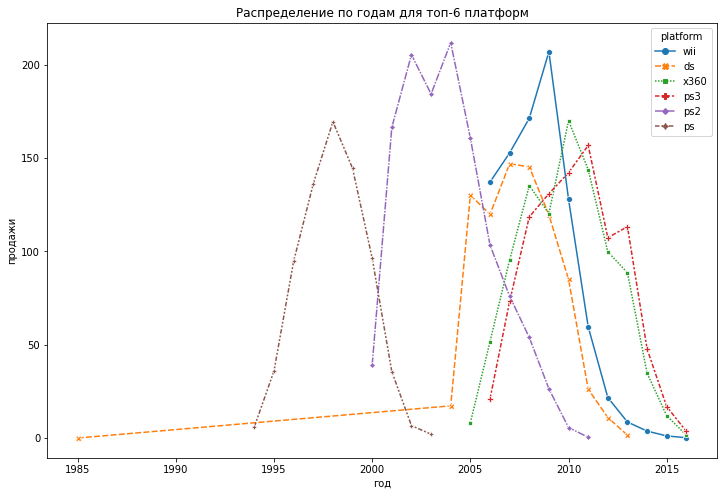

'Продолжительность жизни платформы ps2 составляет 12 лет: c 2000 по 2011'

'Продолжительность жизни платформы x360 составляет 12 лет: c 2005 по 2016'

'Продолжительность жизни платформы ps3 составляет 11 лет: c 2006 по 2016'

'Продолжительность жизни платформы wii составляет 11 лет: c 2006 по 2016'

'Продолжительность жизни платформы ds составляет 29 лет: c 1985 по 2013'

'Продолжительность жизни платформы ps составляет 10 лет: c 1994 по 2003'

In [179]:
# построим график
plt.figure(figsize = (12, 8))

sns.lineplot(x = data_top_platform['year_of_release'], y = data_top_platform['sum_sales'], 
             hue = data_top_platform['platform'],
             style = data_top_platform['platform'],
             markers = True,
             estimator = sum,
             ci = None)

plt.title('Распределение по годам для топ-6 платформ')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show();

# выведем информацию о продолжительности жизни платформ из топ-6
for p_name in top_platform:
    years = data.loc[data.loc[:,'platform'] == p_name]['year_of_release'].unique()
    life = max(years) - min(years) + 1
    display(f'Продолжительность жизни платформы {p_name} составляет {life} лет: c {min(years)} по {max(years)}')

Обратим внимание на жизненный цикл платформы DS: вышла в 1985, в промежутке 1985-2004 данных нет, затем рост популярности с 2004, пик в 2008, конец срока службы в 2013. Таким образом, согласно нашим данным, продолжительность жизни DS составляет 29 лет.

Выход платформы в 1985 кажется очень странным выбросом. Проверив информацию, мы выяснили, что консоль DS была выпущена компанией Nintendo в Канаде, США и Японии в 2004 году. Очевидно, что в данных ошибка, избавимся от аномалий:

In [180]:
data.query('platform == "ds" and year_of_release == 1985') # вывели строку с аномальным значением

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


In [181]:
data = data.drop(index=15957) # удалили строку с аномальным значением

In [182]:
data_top_platform = data.query('platform in @top_platform') # обновим выборку из топ-6 после удаления аномалии

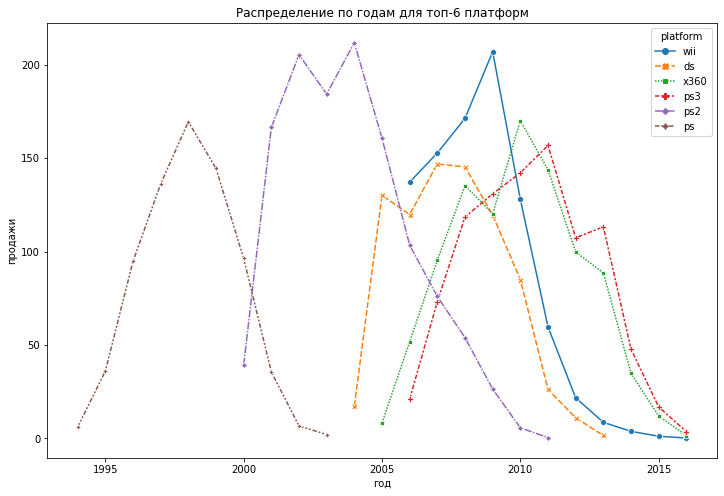

'Продолжительность жизни платформы ps2 составляет 12 лет: c 2000 по 2011'

'Продолжительность жизни платформы x360 составляет 12 лет: c 2005 по 2016'

'Продолжительность жизни платформы ps3 составляет 11 лет: c 2006 по 2016'

'Продолжительность жизни платформы wii составляет 11 лет: c 2006 по 2016'

'Продолжительность жизни платформы ds составляет 10 лет: c 2004 по 2013'

'Продолжительность жизни платформы ps составляет 10 лет: c 1994 по 2003'

In [183]:
# построим график после удаления аномалии
plt.figure(figsize = (12, 8))

sns.lineplot(x = data_top_platform['year_of_release'], y = data_top_platform['sum_sales'], 
             hue = data_top_platform['platform'],
             style = data_top_platform['platform'],
             markers = True,
             estimator = sum,
             ci = None)

plt.title('Распределение по годам для топ-6 платформ')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show();

# выведем информацию о продолжительности жизни платформ из топ-6 после удаления аномалии
for p_name in top_platform:
    years = data.loc[data.loc[:,'platform'] == p_name]['year_of_release'].unique()
    life = max(years) - min(years) + 1
    display(f'Продолжительность жизни платформы {p_name} составляет {life} лет: c {min(years)} по {max(years)}')

---
Итак, можно сделать вывод, что средняя продолжительность жизни платформы - около 11 лет.

На графике можно проследить все этапы жизненного цикла каждой платформы: появление / подъем / пик / снижение / смерть. Также можно заметить, как одна игровая платформа сменяет другую (например, серия игровых консолей PlayStation: PS, PS2, PS3). 

Такие результаты можно объяснить развитием технического прогресса: cо временем "железо" в старых консолях перестает отвечать техническим требованиям новых игр, и на рынке появляются новые консоли.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Выберем актуальный период, за который мы будем анализировать данные и на основании полученных выводов строить прогноз на 2017 год.

Проследим, как менялись поколения платформ PlayStation:  
PS 1994-2003 (продолжительность жизни 10 лет / 7 лет до выхода PS2 в 2000 + 3 года после выхода PS2)  
PS2 2000-2011 (12 лет / 7 лет до выхода PS2 в 2006 + 5 лет после)  
PS3 2006-2016 (11 лет / 8 лет до входа PS4 в 2012 + 3 года после 
PS4 - появилась в 2013 

Можно сделать вывод, что ~ каждые 7 лет компания Sony выпускает новую платформу, а игры на предыдущей платформе еще существуют на рынке около 3-5 лет. Можно предположить, что PS4 просуществует на игровом рынке еще 3-4 года, а топ продаж для нее ожидается на 2017 год.

После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества.
Средний срок создания игры - 2-4 года, так что можно говорить о том, что в 2017 попадут игры, которые начали разрабатывать с 2013. Как мы можем заметить по результатам анализа, хорошие игры на рынке продаются в течении нескольких лет.

В такой динамично меняющейся индустрии, как компьютерные игры, не стоит брать для анализа слишком большой временной интервал, чтобы не захватить уже отжившие тренды. Таким образом, период 2013 по 2016 год - оптимальный для построения прогноза на 2017. Но, cогласно информации в описании проекта, данные за 2016 год неполные, поэтому будем рассматривать 3 года - c 2013 по 2015 включительно.

---
**За актуальный возьмем период с 2013 по 2016 год, данные за предудущие годы отбросим и учитывать в работе не будем.**

In [184]:
data_slice = data.query('2013 <= year_of_release < 2016') # срез данных по всем платформам за актуальный период

In [185]:
data_slice['platform'].unique() # все платформы, чей жизненный цикл попал в период 2013 - 2016

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Построим график, отображающий динамику продаж по всем платформам за актуальный период (2013 - 2016).

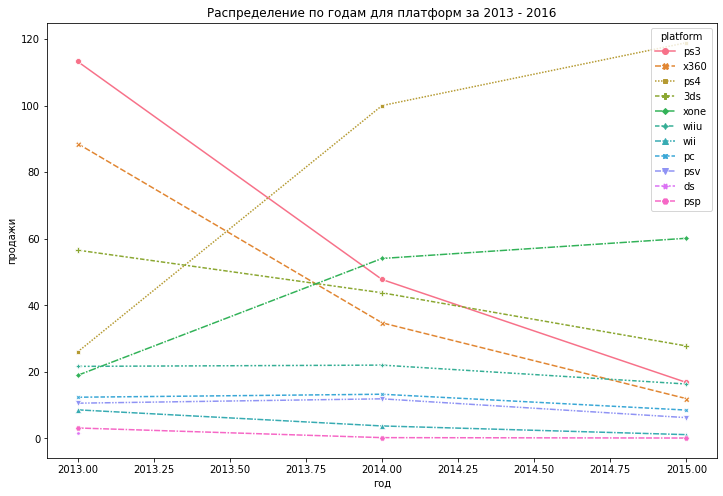

In [186]:
plt.figure(figsize = (12, 8))

sns.lineplot(x = data_slice['year_of_release'], y = data_slice['sum_sales'], 
             hue = data_slice['platform'],
             style = data_slice['platform'],
             markers = True,
             estimator = sum,
             ci = None)

plt.title('Распределение по годам для платформ за 2013 - 2016')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show();

In [187]:
df = data_slice.query('year_of_release == 2015')
ddff = df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
ddff.sort_values('sum_sales', ascending=False).T

platform,ps4,xone,3ds,ps3,wiiu,x360,pc,psv,wii,psp
sum_sales,118.9,60.14,27.78,16.82,16.35,11.96,8.52,6.25,1.14,0.12


На графике видно, что на 2015 лидерами продаж являются платформы PS4, XOne и 3DS.

За период 2013-2015 рост продаж мы наблюдаем только у PS4 и XOne.

Учитывая тот факт, что при значительном объеме продаж можно заработать даже на падающих продажах, платформу 3DS также будем рекомендовать как потенциально прибыльную.

---
**Таким образом, потенциально прибыльные платформы, на которые стоит делать основную ставку при построении прогнозов и планировании на 2017 год - это PS4, XOne и 3DS.**

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

* **Построим диаграммы размаха отдельно для трех потенциально прибыльных платформ, которые отметили ранее (PS4, XOne, 3DS):**

In [188]:
top = ['ps4', 'xone', '3ds'] # потенциально прибыльные платформы, корорые мы выделили

In [189]:
data_slice_top = data_slice.query('platform in @top') # выборка по потенциально прибыльным платформам

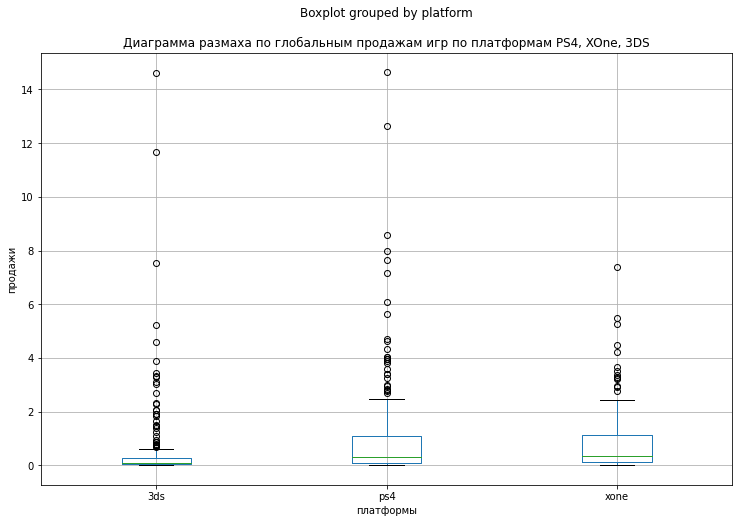

In [190]:
data_slice_top.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(12,8))
plt.title('Диаграмма размаха по глобальным продажам игр по платформам PS4, XOne, 3DS')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show();

In [191]:
data_slice_top.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,257.0,0.498482,1.431660,0.01,0.0400,0.10,0.2900,14.60
ps4,228.0,1.074079,1.899788,0.01,0.0975,0.31,1.1050,14.63
xone,160.0,0.832313,1.182243,0.01,0.1300,0.35,1.1375,7.39


Анализируя информацию по глобальным продажам для платформ PS4, XOne, 3DS мы видим, что минимальное количество проданных копий одинаковое - 10000, максимальные значения у платформ 3DS и PS4 практически одинаковые - 14.60 и 14.63 млн проданных копий соответственно. У платформы XOne максимальная продажа - 7.39 млн копий.

По всем трем платформам видим существенное отличие среднего и медианных значений, значительное стандартное отклонение:  
3DS - среднее 0.5, медианное 0.1, стандартное отклонение 1.43  
PS4 - среднее 1.07, медианное 0.31, стандартное отклонение 1.9  
XOne - среднее 0.83, медианное 0.35, стандартное отклонение 1.18

Такие результаты можно объяснить наличием большого количества игр-бестселлеров на этих платформах, которые являются выбросами: на графике видно, что распределения содержат большое количество выбросов.

* **Построим диаграмму размаха по глобальным продажам игр в разбивке по всем платформам:**

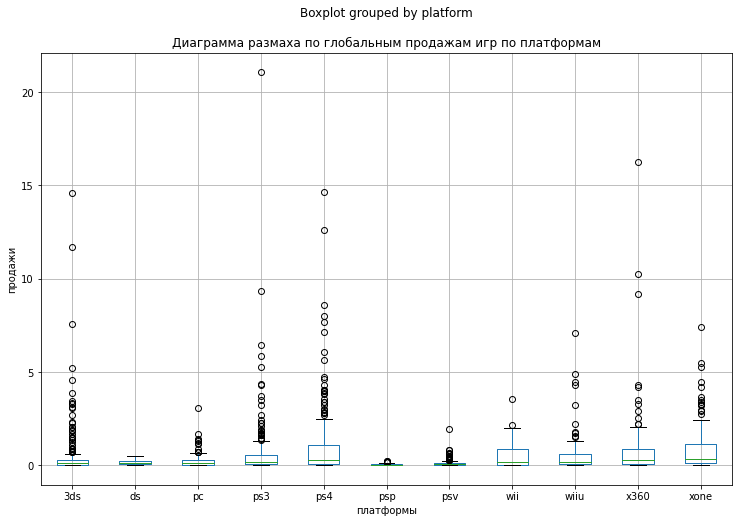

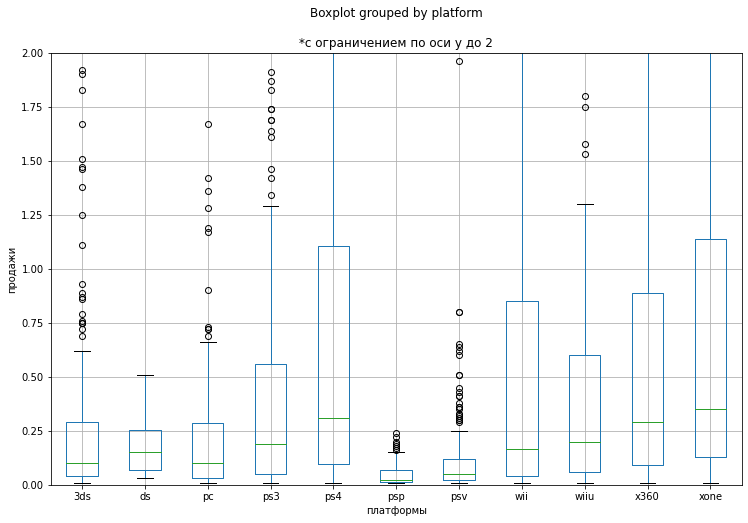

In [192]:
data_slice.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(12,8))
plt.title('Диаграмма размаха по глобальным продажам игр по платформам')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show();

data_slice.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(12,8))
plt.ylim([0, 2])
plt.title('*с ограничением по оси y до 2')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.show();

In [193]:
data_slice.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,257.0,0.498482,1.431660,0.01,0.0400,0.100,0.2900,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,135.0,0.253185,0.399785,0.01,0.0300,0.100,0.2850,3.05
ps3,307.0,0.579251,1.530432,0.01,0.0500,0.190,0.5600,21.05
ps4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
psp,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
psv,273.0,0.105275,0.171310,0.01,0.0200,0.050,0.1200,1.96
wii,22.0,0.612727,0.932412,0.01,0.0425,0.165,0.8525,3.58
wiiu,101.0,0.594356,1.098038,0.01,0.0600,0.200,0.6000,7.09


---
Разбег медианных значений относительно небольшой - медианы по всем платформам находятся практически на одном уровне.

Заметим, что популярные платформы с большим количеством продаж имеют довольно большой разброс величины: среднее значение сильно смещено относительно медианы, стандартное отклонение в несколько раз превосходит среднее значение. 

Такие результаты можно объяснить наличием большого количества бестселлеров на этих платформах, которые являются выбросами: на графике видно, что распределения по продажам среди популярных платформ содержат большое количество выбросов.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для анализа возьмем платформу PS4, которая является лидером продаж на 2015 г. Рассмотрим зависимости: оценка критиков / продажи, оценка пользователей / продажи. Построим диаграммы рассеяния, найдем коэффициенты корреляции Пирсона.

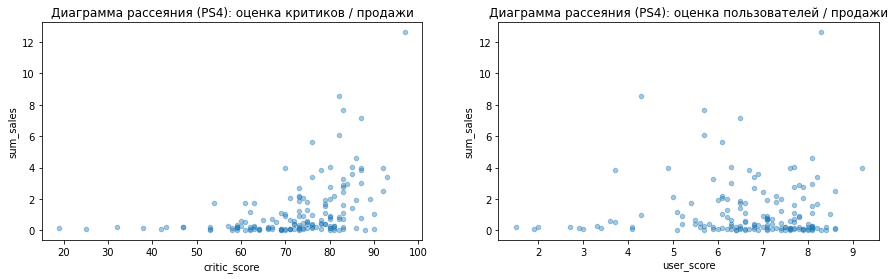

In [194]:
# построим диаграммы рассеяния для платформы PS4
data_slice_ps4 = data_slice.query('platform == "ps4"')

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 4)
data_slice_ps4.plot(ax=ax[0], kind='scatter', \
                    title='Диаграмма рассеяния (PS4): оценка критиков / продажи', x='critic_score', y='sum_sales', alpha=0.4)
data_slice_ps4.plot(ax=ax[1], kind='scatter', \
                    title='Диаграмма рассеяния (PS4): оценка пользователей / продажи', x='user_score', y='sum_sales', alpha=0.4)
plt.show();

In [195]:
# коэффициент корреляции Пирсона между величинами: оценка критиков / продажи
data_slice_ps4['critic_score'].corr(data_slice_ps4['sum_sales']).round(2)

0.43

In [196]:
# коэффициент корреляции Пирсона между величинами: оценка пользователей / продажи
data_slice_ps4['user_score'].corr(data_slice_ps4['sum_sales']).round(2)

0.02

---
Итак, можно сделать вывод, что между оценкой критиков и продажами есть линейная связь (коэффициент корреляции Пирсона равен 0.43), что видно и на диаграмме рассеяния. Можно предположить, что с увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр: чем качественнее игра, тем больше денег она приносит.

Оценка пользователей на продажи почти не влияет (коэффициент корреляции Пирсона практически равен 0), но на диаграмме рассеяния мы видим много выбросов: бывают исключения - иногда бестселлерами становятся игры, средний пользовательский рейтинг которых не превышает 6 баллов.

### Соотнесите выводы с продажами игр на других платформах.

Сгруппируем данные исходного датафрейма по платформам и посмотрим на связи рейтингов и продаж на других платформах:
Рассмотрим матрицы корелляции по всем платформам:

In [197]:
data_slice.groupby('platform')[['critic_score','user_score','sum_sales']].corr()

critic_score  user_score  sum_sales
platform                                                  
3ds      critic_score      1.000000    0.776471   0.384326
         user_score        0.776471    1.000000   0.264711
         sum_sales         0.384326    0.264711   1.000000
ds       critic_score           NaN         NaN        NaN
         user_score             NaN         NaN        NaN
         sum_sales              NaN         NaN   1.000000
pc       critic_score      1.000000    0.412363   0.216403
         user_score        0.412363    1.000000  -0.129428
         sum_sales         0.216403   -0.129428   1.000000
ps3      critic_score      1.000000    0.599920   0.334285
         user_score        0.599920    1.000000  -0.016333
         sum_sales         0.334285   -0.016333   1.000000
ps4      critic_score      1.000000    0.612451   0.431848
         user_score        0.612451    1.000000   0.024231
         sum_sales         0.431848    0.024231   1.000000
psp      critic_score           NaN         NaN        NaN
         user_score             NaN    1.000000  -1.000000
         sum_sales              NaN   -1.000000   1.000000
psv      critic_score      1.000000    0.626165   0.303160
         user_score        0.626165    1.000000   0.017515
         sum_sales         0.303160    0.017515   1.000000
wii      critic_score           NaN         NaN        NaN
         user_score             NaN    1.000000   0.682942
         sum_sales              NaN    0.682942   1.000000
wiiu     critic_score      1.000000    0.703029   0.383951
         user_score        0.703029    1.000000   0.433476
         sum_sales         0.383951    0.433476   1.000000
x360     critic_score      1.000000    0.520946   0.350345
         user_score        0.520946    1.000000  -0.034562
         sum_sales         0.350345   -0.034562   1.000000
xone     critic_score      1.000000    0.499502   0.459385
         user_score        0.499502    1.000000  -0.039268
         sum_sales         0.459385   -0.039268   1.000000

Также рассмотрим диаграммы рассеяния для платформ XOne, 3DS, которые вместе PS4 мы ранее определили как потенциально прибыльные. 

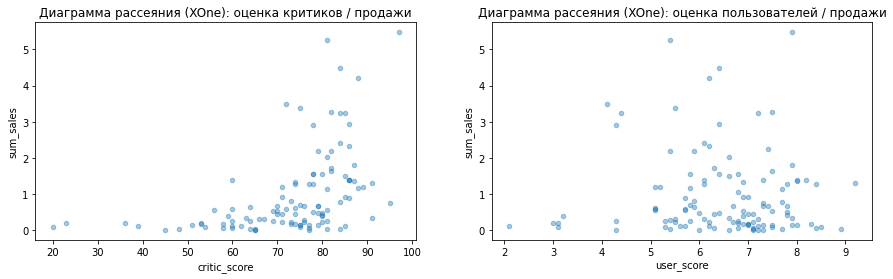

In [198]:
# построим диаграммы рассеяния для платформы XOne
data_slice_xone = data_slice.query('platform == "xone"')

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 4)
data_slice_xone.plot(ax=ax[0], kind='scatter', \
                    title='Диаграмма рассеяния (XOne): оценка критиков / продажи', x='critic_score', y='sum_sales', alpha=0.4)
data_slice_xone.plot(ax=ax[1], kind='scatter', \
                    title='Диаграмма рассеяния (XOne): оценка пользователей / продажи', x='user_score', y='sum_sales', alpha=0.4)
plt.show();

Как мы видим на диаграмме рассеяния для платформы XOne, между оценкой критиков и продажами есть линейная связь (коэффициент корреляции Пирсона равен 0.46). 

Оценка пользователей на продажи почти не влияет (коэффициент корреляции Пирсона равен -0.04), но на диаграмме рассеяния мы видим большое количество выбросов (игры-бестселлеры).

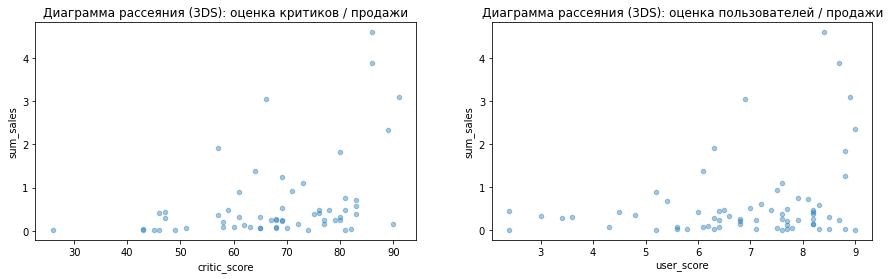

In [199]:
# построим диаграммы рассеяния для платформы 3DS
data_slice_3ds = data_slice.query('platform == "3ds"')

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 4)
data_slice_3ds.plot(ax=ax[0], kind='scatter', \
                    title='Диаграмма рассеяния (3DS): оценка критиков / продажи', x='critic_score', y='sum_sales', alpha=0.4)
data_slice_3ds.plot(ax=ax[1], kind='scatter', \
                    title='Диаграмма рассеяния (3DS): оценка пользователей / продажи', x='user_score', y='sum_sales', alpha=0.4)
plt.show();

В случае с платформой DS коэффициенты Пирсона отображают наличие линейной связи между оценкой критиков и продажами (коэффициент равен 0.38) и чуть более слабую линейную связь между оценкой пользователей и продажами (коэффициент равен 0.26).

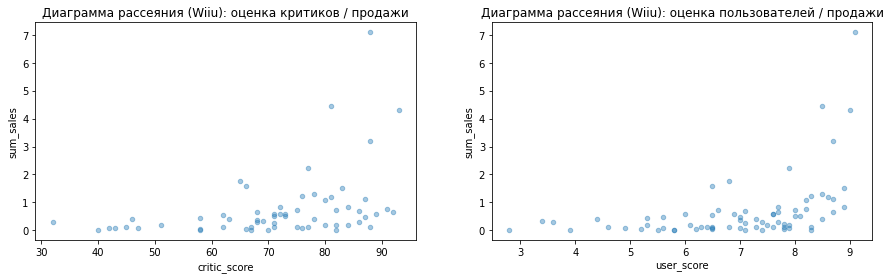

In [200]:
# построим диаграммы рассеяния для платформы Wiiu
data_slice_wiiu = data_slice.query('platform == "wiiu"')

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 4)
data_slice_wiiu.plot(ax=ax[0], kind='scatter', \
                    title='Диаграмма рассеяния (Wiiu): оценка критиков / продажи', x='critic_score', y='sum_sales', alpha=0.4)
data_slice_wiiu.plot(ax=ax[1], kind='scatter', \
                    title='Диаграмма рассеяния (Wiiu): оценка пользователей / продажи', x='user_score', y='sum_sales', alpha=0.4)
plt.show();

Анализируя связь оценок и продаж в ситуации с платформой Wiiu, заметим, что  зависимость продаж от рейтинга пользователей сопоставима с зависимостью от рейтинга критиков (коэффициент корреляции Пирсона равен 0.43 и 0.38 соответственно). Наличие линейной связи можно увидеть и на диаграммах рассеяния.

---

Итак, мы построили диаграммы рассеяния для платформ PS4, XOne, 3DS и Wiiu, для всех платформ построили матрицу корелляции.

Можно сделать вывод, что в целом выявленные для платформы PS4 тенденции повторяются и для остальных платформ: между оценками и продажами есть прямая линейная связь, но в случае с оценками критиков связь более сильная, связь оценок пользователей с продажами очень слабая, практически отсутствует.

Но есть исключения - например, для платформы WiiU зависимость продаж от рейтинга пользователей сопоставима с зависимостью от рейтинга критиков. Также есть игры с высокой оценкой критиков и слабой выручкой.

Можно предположить, что пользователи более критичны к играм, чем критики, но по причине ограниченности данных (в рамках проекта) мы не сможем оценить, какие действия повлияли на рост продаж в рамках нашего проекта.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим, какие уникальные жанры игр представлены в нашей выборке:

In [201]:
data_slice['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

Рассмотрим общее распредление игр по жанрам (от самых популярных к менее популярным). В строке 'percent' содержится процент продаж по конкретному жанру ко всем продажам.

In [202]:
data_slice_genre = data_slice.pivot_table(index = 'genre', values = 'sum_sales', aggfunc='sum')\
.sort_values('sum_sales', ascending=False)
data_slice_genre['percent'] = round(data_slice_genre['sum_sales'] / data_slice_genre['sum_sales'].sum()*100, 2)
data_slice_genre.T

genre,Action,Shooter,Role-Playing,Sports,Misc,Platform,Racing,Fighting,Simulation,Adventure,Strategy,Puzzle
sum_sales,291.76,194.76,127.71,127.16,60.22,39.4,37.10,30.84,19.87,19.82,8.95,3.16
percent,30.37,20.27,13.29,13.24,6.27,4.1,3.86,3.21,2.07,2.06,0.93,0.33


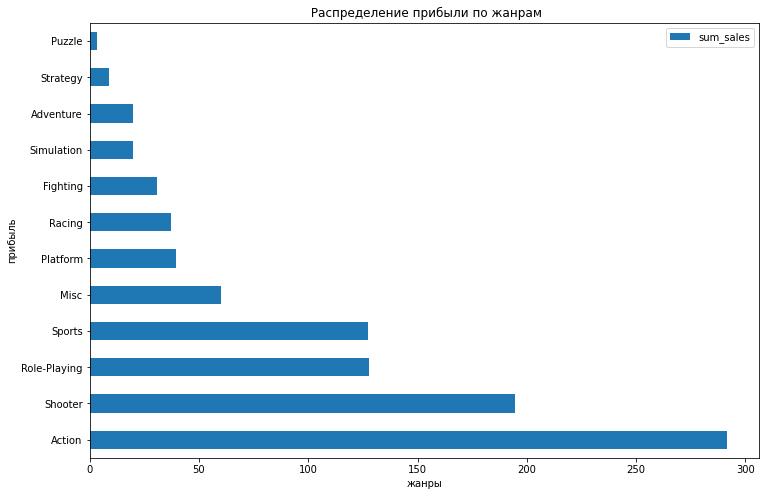

In [203]:
data_slice_genre.plot(y='sum_sales', kind='barh', figsize=(12, 8))
plt.title(' Распределение прибыли по жанрам')
plt.xlabel('жанры')
plt.ylabel('прибыль')
plt.show();

С большим отрывом по продажам лидирует жанр Action. Второе место занимают игры в жанре Shooter. Третье место с большим отрывом от остальных жанров разделили Role-Playing и Sports - количество продаж практически одинаковое (127.71 и 127.16). 

Игры в жанре Action очень динамичны, имеют акцент на борьбе, включают в себя прохождение определённых уровней для достижения битвы с боссами. Популярность этого жанра обусловлена желанием людей проверить свои навыки ловкости и реакции.  
Также возможная причина популярности в том, что жанр Action может развиваться во множество направлений - практически каждую вторую игру можно считать экшеном, хотя на самом деле она может являться как шутером, так и платформером, файтингом и др, часто жанр Action становится приставкой к другому жанру.

Популярность шутеров («стрелялок»), ролевых и спортивых игр обусловлена тем, что в большинстве из них есть возможность играть одновременно нескольким игрокам - своего рода соревнования.

На период 2008-2016 год не пользуются большой популярностью жанры Platform, Racing, Fighting, Simulation, Adventure, Strategy и Puzzle. 

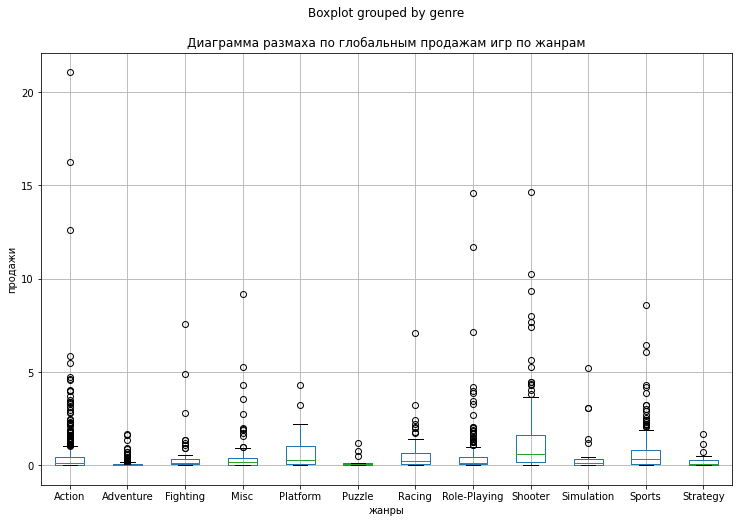

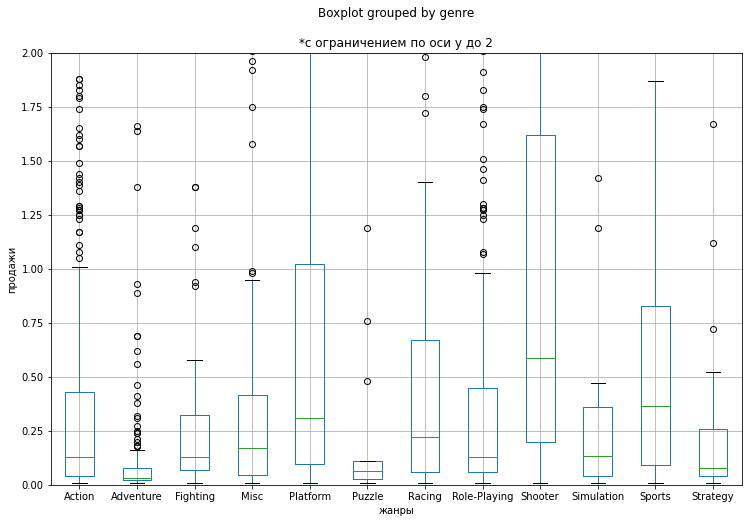

In [204]:
data_slice.boxplot(column = ['sum_sales'],by = ['genre'],figsize=(12, 8))
plt.title('Диаграмма размаха по глобальным продажам игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.show();

data_slice.boxplot(column = ['sum_sales'],by = ['genre'],figsize=(12, 8))
plt.ylim([0, 2])
plt.title('*с ограничением по оси y до 2')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.show();

In [205]:
data_slice.groupby('genre')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,588.0,0.496190,1.411681,0.01,0.0400,0.130,0.4300,21.05
Adventure,189.0,0.104868,0.233383,0.01,0.0200,0.030,0.0800,1.66
Fighting,64.0,0.481875,1.156185,0.01,0.0675,0.130,0.3225,7.55
Misc,123.0,0.489593,1.115217,0.01,0.0450,0.170,0.4150,9.18
Platform,59.0,0.667797,0.862009,0.01,0.0950,0.310,1.0200,4.32
Puzzle,16.0,0.197500,0.332536,0.01,0.0275,0.065,0.1100,1.19
Racing,61.0,0.608197,1.100926,0.01,0.0600,0.220,0.6700,7.09
Role-Playing,238.0,0.536597,1.421777,0.01,0.0600,0.130,0.4500,14.60
Shooter,140.0,1.391143,2.187639,0.01,0.2000,0.585,1.6175,14.63


Заметим, что в жанре Action много выбросов (очень прибыльных игр). Из-за этого общая прибыль по жанру Action выше остальных. Но медианное значение продаж выше в жанре Shooter. Второе место по медианным продажам занимает Sports, третье - Platform.

---

Можно сделать вывод, что при планировании продаж на 2017 год стоит делать ставку на жанры Action (лидер продаж) и Shooter (лидирует по медианным значениям продаж).

---
**Выводы:**

1) За рассматриваемый временной промежуток 1980-2008 меньше всего игр было выпущено в 1980 (9 игр), больше всего - в 2008 (1427).

До 1993 года игр практически не было, они начали появляться с 1993 (в 1993 был создан Pentium 1). Можно заметить резкий скачок количества выпущенных игр в 2002 и пик в 2008-2009.

С 2010 на рынке игр был спад, который предположительно можно связать с развитием мобильных устройств и ростом популярности социальных сетей и, как следствие, снижение интереса к играм и сокращение их выпуска. Одна из возможных причин спада заключается в том, что с развитием технологий изменились и требования к игре - появились возможности создавать более качественный продукт с новым геймплеем и графикой, но процесс создания новой игры стал более длительным. Также есть вероятность, что на снижение выпуска новых игр оказал влияние мировой экономический кризис (2008-2013). 

Данные по всем периодам не важны: из рассмотрения можно исключить период до 1994 года, когда количество выпущенных игр было совсем небольшим (меньше 100).

---
2) По продажам лидирует платформа PS2. Далее, с большим отрывом от остальных платформ идут X360, PS3, Wii, DS, PS.

С учетом того, что по количеству продаж 6-е место (PS) расположено довольно близко к 5-му (DS) и первые 6 платформ значительно опережают все остальные, для дальнейшего рассмотрения мы выбрали топ-6 платформ: PS2, X360, PS3, Wii, DS, PS.

Также было выявлено, что средняя продолжительность жизни платформы - около 11 лет.

---
3) Определили актуальный период 3 года - c 2013 по 2016 (не включая 2016, т.к. cогласно информации в описании проекта, данные за 2016 год неполные. Данные за предудущие годы в дальнейшем исследовании не учитывали.

---
4) На 2015 лидерами продаж являются платформы PS4, XOne и 3DS. Рост продаж мы наблюдаем только у PS4 и XOne, но платформу 3DS также отнесли к потенциально прибыльным, т.к. имеет значительный объеме продаж. Основную ставку при построении прогнозов и планировании на 2017 год стоит делать на платформы PS4, XOne и 3DS.

---
5) Была построена диаграмма размаха по глобальным продажам игр в разбивке по платформам и проведен анализ.

В результате было выявлено, что разбег медианных значений относительно небольшой - медианы по всем платформам находятся практически на одном уровне. 

Популярные платформы с большим количеством продаж имеют довольно большой разброс величины: среднее значение сильно смещено относительно медианы, стандартное отклонение в несколько раз превосходит среднее значение. Такие результаты можно объяснить наличием большого количества бестселлеров на этих платформах, которые являются выбросами.

---
6) Мы рассмотрели зависимости: оценка критиков / продажи, оценка пользователей / продажи. Были построены диаграммы рассеяния для платформ PS4, XOne, 3DS и Wiiu, для всех платформ была построена матрица корелляции.

Можно сделать вывод, что в целом выявленные для платформы PS4 тенденции повторяются и для остальных платформ: между оценками и продажами есть прямая линейная связь. В случае с оценками критиков связь более сильная, оценка пользователей на продажи почти не влияет, но на диаграмме рассеяния мы видим много выбросов (игры-бестселлеры).

---
7) Изучив распределение игр по жанрам, мы выявили, что большим отрывом по продажам лидирует жанр Action. Второе место занимают игры в жанре Shooter, третье делят Role-Playing и Sports.

При планировании продаж на 2017 год стоит делать ставку на жанры Action (лидер продаж) и Shooter (лидирует по медианным значениям продаж).

## Шаг 4. Портрет пользователя каждого региона

Составим портрет пользователя каждого региона (Северная Америка, Европа, Япония):
* определим топ-5 самых популярных платформ 
* определим топ-5 самых популярных жанров
* выясним, влияет ли рейтинг ESRB на продажи

В датафрейме data_slice информация о продажах находится в столбцах 'na_sales', 'eu_sales', 'jp_sales' (продажи в Северной Америке, в Европе и в Японии соответственно).

Также отметим, что мы рассматриваем актуальный период (2013 - 2016). Датафрейм data_slice содержит информацию только за 2013 - 2016. И портрет пользователя каждого региона мы получим тоже, соответственно, за этот период. 

* **Рассмотрим, какие возрастные категории (рейтинг ESRB) есть в рассматриваемой выборке и что они означают**

In [206]:
len(data_slice['rating'].unique())

5

In [207]:
data_slice['rating'].unique()

array(['M', 'RP', 'E', 'T', 'E10+'], dtype=object)

Столбец 'rating', помимо категории «RP» (игра без рейтинга) содержит 4 уникальных значения. Вспомним, что собозначают эти категории огласно рейтингу ESRB :

**«M»** («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет  
**«E»** («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет)  
**«T»** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет  
**«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»  

* **Рассмотрим, какие жанры есть в рассматриваемой выборке и что они означают**

In [208]:
len(data_slice['genre'].unique())

12

In [209]:
data_slice['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

Столбец 'genre' содержит 12 уникальных жанров, для понимания дадим краткое описание некоторым из них:

**Platform** - жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня

**Misc** (miscellaneous game) - игры в категории skill-and-action; они не относятся к боевым играм(Combat),играм с выходом из лабиринта(Maze), спортивным играм(Sports), играм на удержание мяча(Paddle) или гонкам(Race); это новые игры, где проверяется ловкость и реакция игрока другими способами

**Action** - жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, таких как зрительно-моторная координация и скорость реакции; игры в жанре Action имеют акцент на борьбе, включают в себя прохождение определённых уровней для достижения битвы с боссами.

**Role-Playing** (RPG) — жанр компьютерных игр, в котором игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений

**Shooter** - это жанр компьютерных игр, в которых основной акцент делается на стрельбе и боевых действиях («стрелялка»)

---
Для удобства будем использовать функцию *region_top*: на входе 2 аргумента - это param (платформа / жанр / рейтинг) и region - информация о количестве проданных копий в регионе; на выходе - сводная таблица.

In [210]:
def region_top (param, region):
    reg_top = data_slice.pivot_table(index = param, values = region, aggfunc='sum')\
    .sort_values(region, ascending=False)

    if param == 'rating':
        # по параметру 'rating' за актуальный период всего 5 уникальных категорий
        reg_top_fin = reg_top
    
    else:
        # сумма млн проданных копий по не топ-5 платформ
        other_sum = reg_top[region].sum() - reg_top.head()[region].sum() 

        # добавим строку 'другие' с информацией по сумма млн проданных копий по не топ-5 платформ
        reg_top_fin = reg_top.head().T 
        reg_top_fin['другие'] = other_sum
        reg_top_fin = reg_top_fin.T
    
    return reg_top_fin

### Портрет пользователя для каждого региона

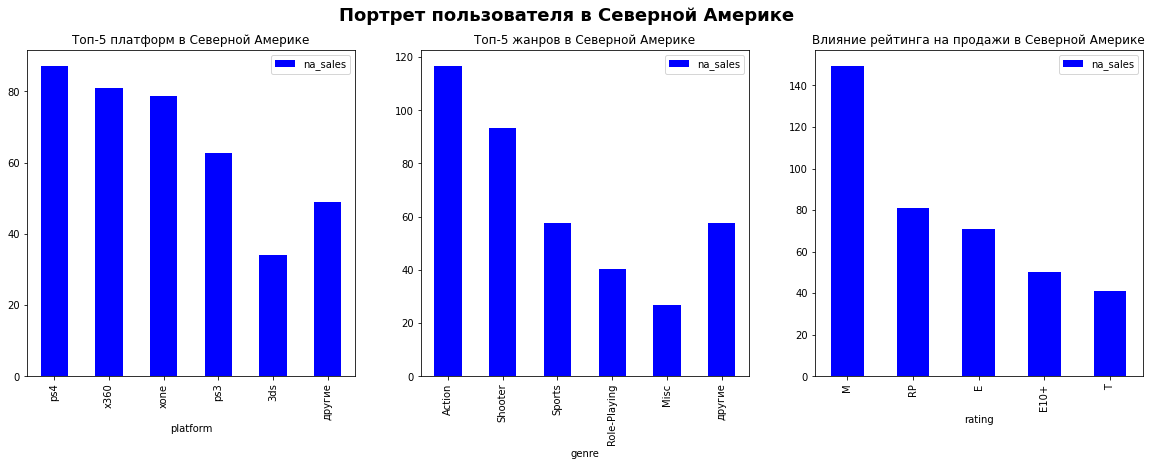

In [211]:
# построим столбчатый график: топ-5 платформ, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Портрет пользователя в Северной Америке', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('platform','na_sales').plot(ax=ax[0], kind='bar', title='Топ-5 платформ в Северной Америке', color='blue')
region_top('genre','na_sales').plot(ax=ax[1], kind='bar', title='Топ-5 жанров в Северной Америке', color='blue')
region_top('rating','na_sales').plot(ax=ax[2], kind='bar', title='Влияние рейтинга на продажи в Северной Америке', color='blue')
plt.show();

In [212]:
display(region_top('platform','na_sales').T)
display(region_top('genre','na_sales').T)
display(region_top('rating','na_sales').T)

platform,ps4,x360,xone,ps3,3ds,другие
na_sales,87.25,80.97,78.85,62.83,34.06,48.82


genre,Action,Shooter,Sports,Role-Playing,Misc,другие
na_sales,116.76,93.5,57.73,40.51,26.73,57.55


rating,M,RP,E,E10+,T
na_sales,149.54,80.89,71.08,50.43,40.84


---
**Американский игрок** - взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action.

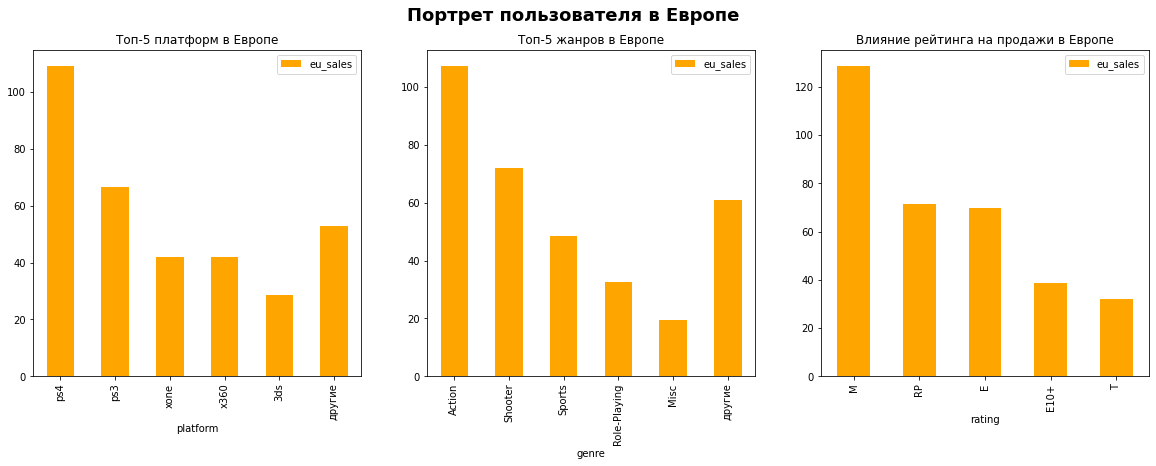

In [213]:
# построим столбчатый график: топ-5 платформ, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Портрет пользователя в Европе', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('platform','eu_sales').plot(ax=ax[0], kind='bar', title='Топ-5 платформ в Европе', color='orange')
region_top('genre','eu_sales').plot(ax=ax[1], kind='bar', title='Топ-5 жанров в Европе', color='orange')
region_top('rating','eu_sales').plot(ax=ax[2], kind='bar', title='Влияние рейтинга на продажи в Европе', color='orange')
plt.show();

In [214]:
display(region_top('platform','eu_sales').T)
display(region_top('genre','eu_sales').T)
display(region_top('rating','eu_sales').T)

platform,ps4,ps3,xone,x360,3ds,другие
eu_sales,109.31,66.55,41.96,41.81,28.63,52.75


genre,Action,Shooter,Sports,Role-Playing,Misc,другие
eu_sales,107.45,71.96,48.51,32.69,19.38,61.02


rating,M,RP,E,E10+,T
eu_sales,128.78,71.44,69.75,38.88,32.16


---
**Европейский игрок** - взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action.  
Заметим, что портреты игроков в Северной Америке и Европе совпадают.

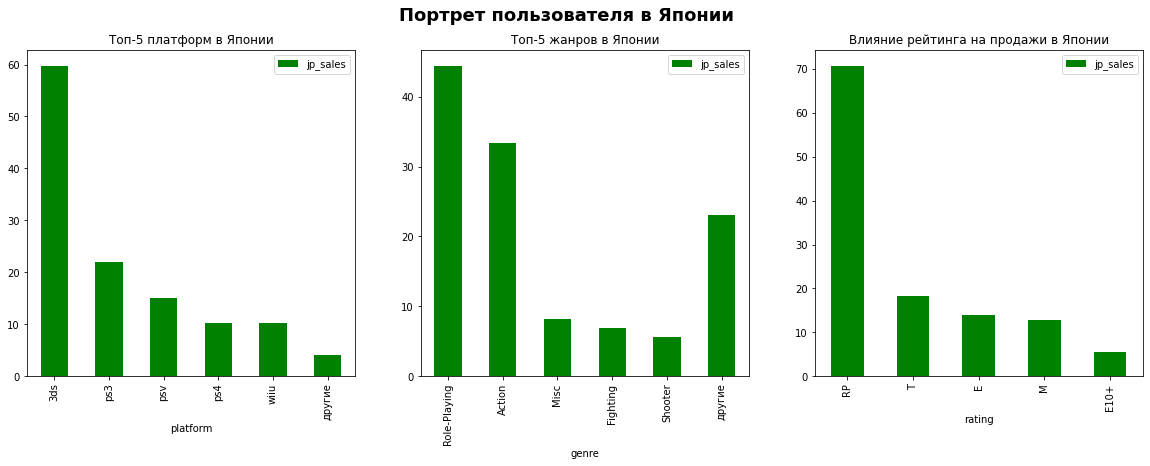

In [215]:
# построим столбчатый график: топ-5 платформ, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Портрет пользователя в Японии', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('platform','jp_sales').plot(ax=ax[0], kind='bar', title='Топ-5 платформ в Японии', color='green')
region_top('genre','jp_sales').plot(ax=ax[1], kind='bar', title='Топ-5 жанров в Японии', color='green')
region_top('rating','jp_sales').plot(ax=ax[2], kind='bar', title='Влияние рейтинга на продажи в Японии', color='green')
plt.show();

In [216]:
display(region_top('platform','jp_sales').T)
display(region_top('genre','jp_sales').T)
display(region_top('rating','jp_sales').T)

platform,3ds,ps3,psv,ps4,wiiu,другие
jp_sales,59.78,22.05,15.03,10.22,10.21,4.18


genre,Role-Playing,Action,Misc,Fighting,Shooter,другие
jp_sales,44.43,33.42,8.16,6.9,5.55,23.01


rating,RP,T,E,M,E10+
jp_sales,70.73,18.32,14.07,12.91,5.44


---
**Японский игрок** - возраст не определен, любит играть на 3DS и предпочитает игры жанра Role-Playing.

Отметим, что в Японии самая распространенная категория игроков - «RP» (игра без рейтинга). Возможная причина такой ситуации в том, что организация ESRB - негосударственная, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде (!). Скорее всего, в Японии свой рынок игр, который просто не оценивается данной организацией.

### Топ-5 платформ, жанров и рейтингов в сравнении по регионам

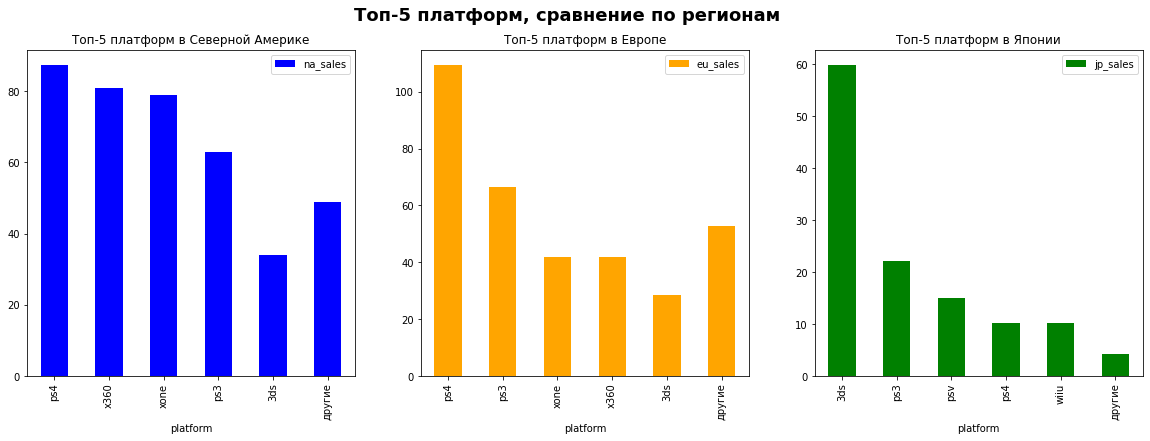

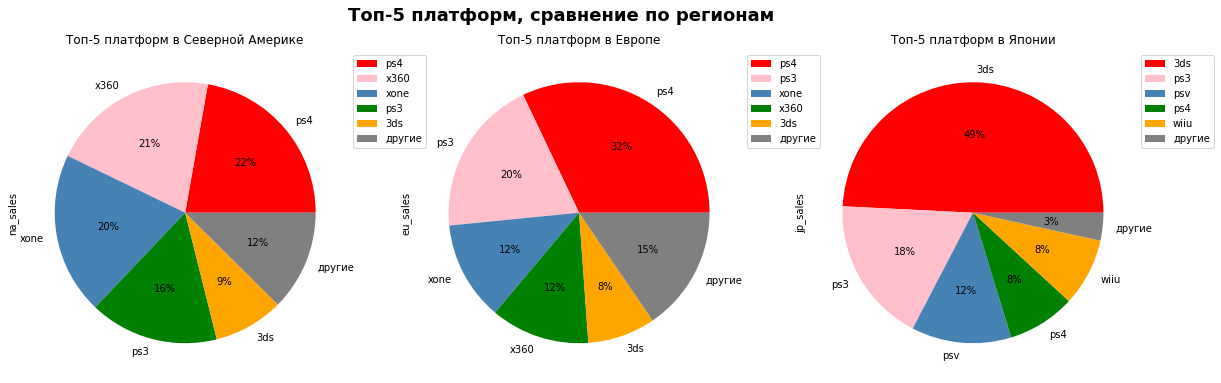

In [217]:
# построим столбчатый график: топ-5 платформ, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 платформ, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('platform','na_sales').plot(ax=ax[0], kind='bar', title='Топ-5 платформ в Северной Америке', color='blue')
region_top('platform','eu_sales').plot(ax=ax[1], kind='bar', title='Топ-5 платформ в Европе', color='orange')
region_top('platform','jp_sales').plot(ax=ax[2], kind='bar', title='Топ-5 платформ в Японии', color='green')
plt.show();

# построим круговую диаграмму: топ-5 платформ, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 платформ, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)

region_top('platform','na_sales').plot(
                                    ax=ax[0],
                                    kind='pie',
                                    #title='Топ-5 платформ в Северной Америке',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('platform','eu_sales').plot(
                                    ax=ax[1], 
                                    kind='pie',
                                    #title='Топ-5 платформ в Европе',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('platform','jp_sales').plot(
                                    ax=ax[2],
                                    kind='pie',
                                    #title='Топ-5 платформ в Японии',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

ax[0].set_title('Топ-5 платформ в Северной Америке')
ax[0].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

ax[1].set_title('Топ-5 платформ в Европе')
ax[1].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

ax[2].set_title('Топ-5 платформ в Японии')
ax[2].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show();

In [218]:
display(region_top('platform','na_sales').T)
display(region_top('platform','eu_sales').T)
display(region_top('platform','jp_sales').T)

platform,ps4,x360,xone,ps3,3ds,другие
na_sales,87.25,80.97,78.85,62.83,34.06,48.82


platform,ps4,ps3,xone,x360,3ds,другие
eu_sales,109.31,66.55,41.96,41.81,28.63,52.75


platform,3ds,ps3,psv,ps4,wiiu,другие
jp_sales,59.78,22.05,15.03,10.22,10.21,4.18


---
Можно предположить, что различия в популярности платформ зависит от популярности фирмы-производителя: заметим, что во всех рейтингах присутствует продукция компании Sony (PS3, PS4).

Популярность платформы также зависит от местоположения производителя. Например, в Северной Америке в топ-5 входят патформы XOne и X360 (Microsoft), в Японии в топе платформы 3DS и WiiU (-Nintendo). В Европе нет крупных компаний-разработчиков платформ, поэтому европейский рынок ориентирован на общую популярность платформы.

---

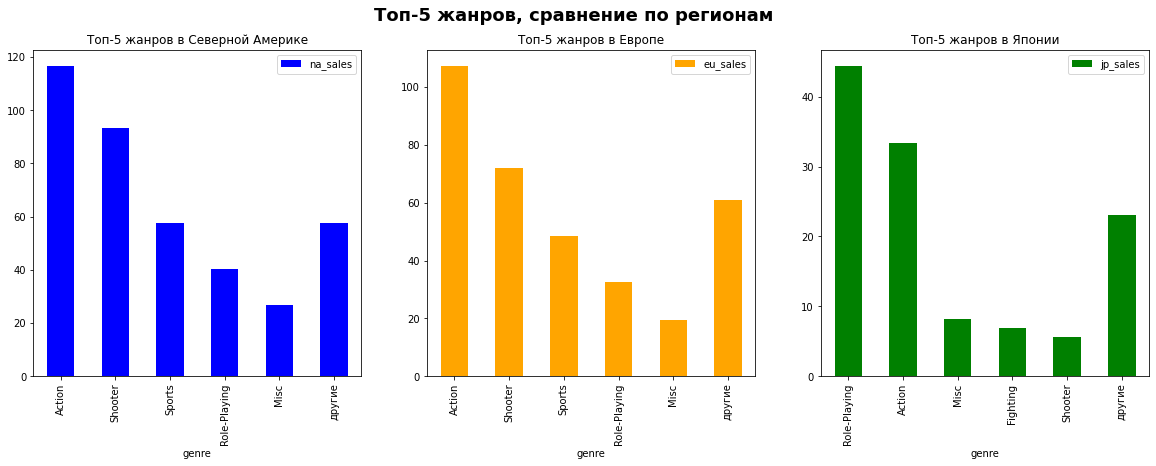

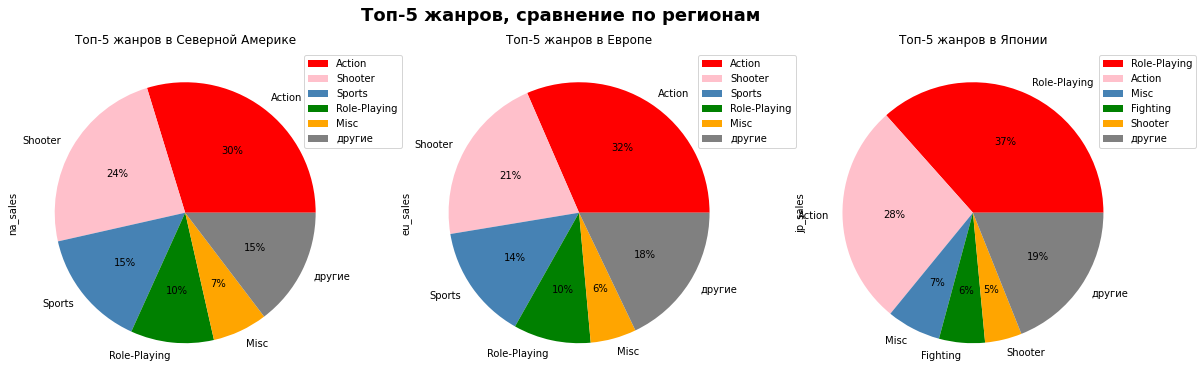

In [219]:
# построим столбчатый график: топ-5 жанров, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 жанров, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('genre','na_sales').plot(ax=ax[0], kind='bar', title='Топ-5 жанров в Северной Америке', color='blue')
region_top('genre','eu_sales').plot(ax=ax[1], kind='bar', title='Топ-5 жанров в Европе', color='orange')
region_top('genre','jp_sales').plot(ax=ax[2], kind='bar', title='Топ-5 жанров в Японии', color='green')
plt.show();

# построим круговую диаграмму: топ-5 жанров, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 жанров, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)

region_top('genre','na_sales').plot(
                                    ax=ax[0],
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('genre','eu_sales').plot(
                                    ax=ax[1], 
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('genre','jp_sales').plot(
                                    ax=ax[2],
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

ax[0].set_title('Топ-5 жанров в Северной Америке')
ax[0].legend(bbox_to_anchor=(0.85, 1), loc='upper left')

ax[1].set_title('Топ-5 жанров в Европе')
ax[1].legend(bbox_to_anchor=(0.85, 1), loc='upper left')

ax[2].set_title('Топ-5 жанров в Японии')
ax[2].legend(bbox_to_anchor=(0.87, 1), loc='upper left')

plt.show();

In [220]:
display(region_top('genre','na_sales').T)
display(region_top('genre','eu_sales').T)
display(region_top('genre','jp_sales').T)

genre,Action,Shooter,Sports,Role-Playing,Misc,другие
na_sales,116.76,93.5,57.73,40.51,26.73,57.55


genre,Action,Shooter,Sports,Role-Playing,Misc,другие
eu_sales,107.45,71.96,48.51,32.69,19.38,61.02


genre,Role-Playing,Action,Misc,Fighting,Shooter,другие
jp_sales,44.43,33.42,8.16,6.9,5.55,23.01


---
Топ-5 жанров в Америке и Европе совпадают. 
Японские игроки отличаются от американских и европейских, в Японии популярнее игры с закрученным сюжетом (RPG). 

Игры жанра Action находятся в топе во всех регионах. Игры этого жанра очень динамичны, поэтому они имеют высокую популярность. Но на мой взгляд, главная причина популярности в том, что жанр Action может развиваться во множество направлений - практически каждую вторую игру можно считать экшеном, хотя на самом деле она может являться как шутером, так и платформером, файтингом и др, часто жанр Action становится приставкой к другому жанру. 

---

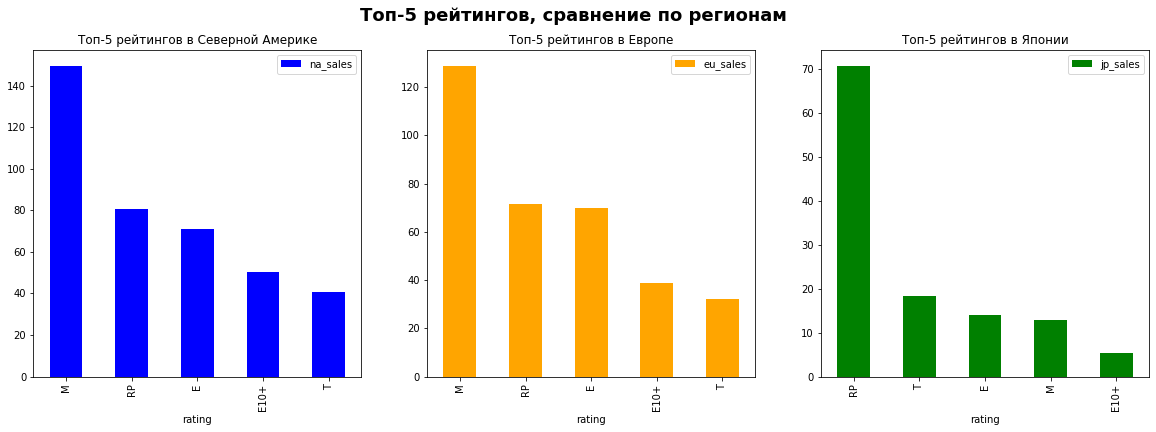

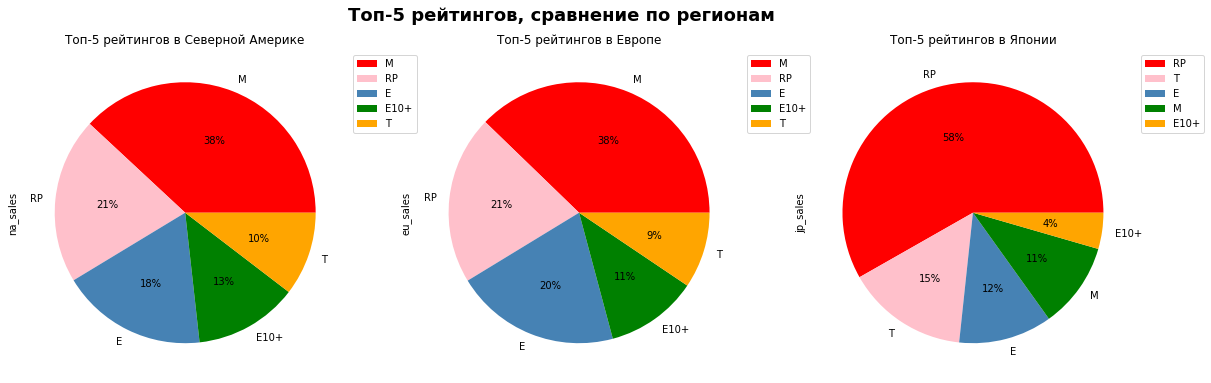

In [221]:
# построим столбчатый график: топ-5 рейтингов, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 рейтингов, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)
region_top('rating','na_sales').plot(ax=ax[0], kind='bar', title='Топ-5 рейтингов в Северной Америке', color='blue')
region_top('rating','eu_sales').plot(ax=ax[1], kind='bar', title='Топ-5 рейтингов в Европе', color='orange')
region_top('rating','jp_sales').plot(ax=ax[2], kind='bar', title='Топ-5 рейтингов в Японии', color='green')
plt.show();

# построим круговую диаграмму: топ-5 рейтингов, сравнение по регионам
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Топ-5 рейтингов, сравнение по регионам', fontsize=18, fontweight='bold')
fig.set_size_inches(20, 6)

region_top('rating','na_sales').plot(
                                    ax=ax[0],
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('rating','eu_sales').plot(
                                    ax=ax[1], 
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

region_top('rating','jp_sales').plot(
                                    ax=ax[2],
                                    kind='pie',
                                    colors=['red', 'pink', 'steelblue', 'green', 'orange', 'grey'],
                                    autopct='%1.0f%%',
                                    subplots=True)

ax[0].set_title('Топ-5 рейтингов в Северной Америке')
ax[0].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

ax[1].set_title('Топ-5 рейтингов в Европе')
ax[1].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

ax[2].set_title('Топ-5 рейтингов в Японии')
ax[2].legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show();

In [222]:
display(region_top('rating','na_sales').T)
display(region_top('rating','eu_sales').T)
display(region_top('rating','jp_sales').T)

rating,M,RP,E,E10+,T
na_sales,149.54,80.89,71.08,50.43,40.84


rating,M,RP,E,E10+,T
eu_sales,128.78,71.44,69.75,38.88,32.16


rating,RP,T,E,M,E10+
jp_sales,70.73,18.32,14.07,12.91,5.44


---
В Америке и Европе ситуации идентичные: наибольшую популярность имеют игры категории «M» (возрастной рейтинг 17+). Можно сделать вывод, что эти рынки ориентированы на взрослых пользователей. 

Cамая распространенная категория игроков в Японии - «RP» (игра без рейтинга). Возможная причина такой ситуации в том, что организация ESRB - негосударственная, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде (!). Скорее всего, в Японии свой рынок игр, который просто не оценивается данной организацией.

Игры для детей и подростков - категории «T» (13+) и «E10+» (10+) менее всего популярны во всех регионах.

---
**Вывод:**

На этом шаге для каждого региона (Северная Америка, Европа, Япония) мы определили топ-5 самых популярных платформ, жанров, выявили самые популярные возрастные категории игроков, а также предположили возможные причины полученных результатов.

Для оптимизации работы использовали функцию *region_top*: на входе 2 аргумента - это param (платформа / жанр / рейтинг) и region - информация о количестве проданных копий в регионе; на выходе - сводная таблица.

В результате анализа были составлены портреты пользователей каждого региона.  

Портреты игроков в Северной Америке и Европе совпадают: взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action.

Японский игрок - возраст не определен, любит играть на 3DS и предпочитает игры жанра Role-Playing (есть предположение, что игровой рынок Японии не оценивается организацией ESRB)

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для анализа создадим два новых датафрейма data_xone и data_pc - срезы датафрейма data_slice по платформам Xbox One и PC.  
Игры с пустым рейтингом учитывать не будем.

In [223]:
data_xone = data_slice.query('platform == "xone"')
data_xone = data_xone.dropna(subset=['user_score'])

In [224]:
data_pc = data_slice.query('platform == "pc"')
data_pc = data_pc.dropna(subset=['user_score'])

Приставка XOne на игровом рынке существует относительно недавно - с 2013, а год выпуска PC - 1985. 

Безусловно, для получения корректных результатов исследования стоит выровнять периоды использования платформ. Отметим, что мы рассматриваем выборку data_slice - это срез исходного датафрейма за актуральный период (2013 - 2016). В это время обе приставки уже были на рынке.

In [225]:
sorted(data.query('platform == "xone"')['year_of_release'].unique()) # годы использования платформы XOne

[2013, 2014, 2015, 2016]

In [226]:
sorted(data.query('platform == "pc"')['year_of_release'].unique()) # годы использования платформы PC

[1985,
 1988,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

Сформулируем гипотезы:

* **Нулевая гипотеза:** cредние пользовательские рейтинги платформ Xbox One и PC равны
* **Альтернативная гипотеза:** cредние пользовательские рейтинги платформ Xbox One и PC не равны

Дак как сравниваем сравниваем две независимые выборки - data_xone, data_pc, будем использвать метод ttest_ind().

In [227]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


Р-значение: 0.2827494983260732 означает, что при условии того, что cредние пользовательские рейтинги платформ Xbox One и PC равны, значение статистик для данных выборок будет таким же или более экстремальным по сравнению с ранее наблюдаемым с вероятностью 28.3 %

Проведем проверку и найдем cредние пользовательские рейтинги платформ Xbox One и PC:

In [228]:
data_xone['user_score'].mean().round(2)

6.48

In [229]:
data_pc['user_score'].mean().round(2)

6.26

Действительно, полученные при поверке значения (6.48 и 6.26) находится довольно близко друг от друга.

**Вывод:** Статистически значимой разницы между cредними пользовательскими рейтингами платформ Xbox One и PC нет.

### Средние пользовательские рейтинги жанров Action и Sports разные

Для анализа создадим два новых датафрейма data_action и data_sports - срезы датафрейма data_slice по жанрам Action и Sports.
Игры с пустым рейтингом учитывать не будем.

In [231]:
data_action = data_slice.query('genre == "Action"')
data_action = data_action.dropna(subset=['user_score'])

In [232]:
data_sports = data_slice.query('genre == "Sports"')
data_sports = data_sports.dropna(subset=['user_score'])

Сформулируем гипотезы:

* **Нулевая гипотеза:** cредние пользовательские рейтинги жанров Action и Sports равны
* **Альтернативная гипотеза:** cредние пользовательские рейтинги жанров Action и Sports не равны (разные)

Так как сравниваем сравниваем две независимые выборки - data_action, data_sports, будем использвать метод ttest_ind().

In [ ]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Проведем проверку и найдем cредние пользовательские рейтинги жанров Action и Sports:

In [ ]:
data_action['user_score'].mean().round(2)

In [ ]:
data_sports['user_score'].mean().round(2)

Действительно, полученные при поверке значения (6.89 и 5.18) находится достаточно далеко друг от друга.

**Вывод:** Средние пользовательские рейтинги жанров Action и Sports разные.

## Шаг 6. Общий вывод

**Задачи исследования** - проанализировать данные, провести расчеты, составить портрет пользователя по регионам, проверить гипотезы.

**Цель исследования** - на основе полученных результатов выявить определяющие успешность игры закономерности, что позволит интернет-магазину «Стримчик» в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Данные для анализа** – исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, доступные из открытых источников.


### Загрузка данных

Считали CSV-файл, данные сохранили в датафрейм data. Изучили общую информацию: в шести столбцах обнаружили пропуски, в двух - выявили некорректный тип данных.

### Подготовка данных

Подготовили данные к дальнейшему анализу:
* привели названия столбцов к нижнему регистру (для удобства)
* провели работу с пропущенными значениями:
    - удалили строки с пропусками в столбцах 'name', 'year_of_release', 'genre' (271 строка / 1,62 % от всего датафрейма) т.к. логичную замену предложить невозможно, а количество строк оказалось несущественным (после удаления в датафрейме осталось 16444 строк)  
    - в столбцах 'critic_score', 'user_score' пропущенные значения оставили, т.к. логичную замену предложить невозможно, а количество строк с пропусками значительное, и удаление может сильно повлиять на результаты
    - в столбце 'rating' заменили пропущенные значения на «RP» т.к. фактически и «RP» и Nan означает, что игра без рейтинга; также в столбце 'rating' объединили категории 'K-A' и 'E' в 'E' т.к. это одна категория, название которой менялось
    - в столбце 'user_score' произвели замену всех значений 'tbd' на NaN (2376 строк / 0,14 % от всего датафрейма), т.к. выяснили, что 'tbd' фактически является NaN
    - предположили возможные причины появления пропусков (человеческий фактор, отсутствие полной информации, технологический фактор)
* привели данные к корректному типу - столбец 'year_of_release' (год выпуска) преобразовали в формат int64; 'user_score' (оценка пользователей) перевели в float64:
* провели анализ значений в столбце 'rating', сократили количество уникальных категорий с 9 до 7 - категории 'K-A' и 'E' объединили в 'E' (это одна категория, название которой изменилось с «K-A» на «E»), а значения категории "RP" заменили на NaN (фактически «RP» является NaN)
* провели работу с дубликатами - был удален один дубликат
* создали новый столбец 'sum_sales', в котором рассчитали суммарные продажи во всех регионах

### Исследовательский анализ данных

1) За рассматриваемый временной промежуток 1980-2008 меньше всего игр было выпущено в 1980 (9 игр), больше всего - в 2008 (1427).

До 1993 года игр практически не было, они начали появляться с 1993 (в 1993 был создан Pentium 1). Можно заметить резкий скачок количества выпущенных игр в 2002 и пик в 2008-2009.

С 2010 на рынке игр был спад, который предположительно можно связать с развитием мобильных устройств и ростом популярности социальных сетей и, как следствие, снижение интереса к играм и сокращение их выпуска. Одна из возможных причин спада заключается в том, что с развитием технологий изменились и требования к игре - появились возможности создавать более качественный продукт с новым геймплеем и графикой, но процесс создания новой игры стал более длительным. Также есть вероятность, что на снижение выпуска новых игр оказал влияние мировой экономический кризис (2008-2013). 

Данные по всем периодам не важны: из рассмотрения можно исключить период до 1994 года, когда количество выпущенных игр было совсем небольшим (меньше 100).

---
2) По продажам лидирует платформа PS2. Далее, с большим отрывом от остальных платформ идут X360, PS3, Wii, DS, PS.

С учетом того, что по количеству продаж 6-е место (PS) расположено довольно близко к 5-му (DS) и первые 6 платформ значительно опережают все остальные, для дальнейшего рассмотрения мы выбрали топ-6 платформ: PS2, X360, PS3, Wii, DS, PS.

Также было выявлено, что средняя продолжительность жизни платформы - около 11 лет.

---
3) Определили актуальный период 3 года - c 2013 по 2016 (не включая 2016, т.к. cогласно информации в описании проекта, данные за 2016 год неполные. Данные за предудущие годы в дальнейшем исследовании не учитывали.

---
4) На 2015 лидерами продаж являются платформы PS4, XOne и 3DS. Рост продаж мы наблюдаем только у PS4 и XOne, но платформу 3DS также отнесли к потенциально прибыльным, т.к. имеет значительный объеме продаж. Основную ставку при построении прогнозов и планировании на 2017 год стоит делать на платформы PS4, XOne и 3DS.

---
5) Была построена диаграмма размаха по глобальным продажам игр в разбивке по платформам и проведен анализ.

В результате было выявлено, что разбег медианных значений относительно небольшой - медианы по всем платформам находятся практически на одном уровне. 

Популярные платформы с большим количеством продаж имеют довольно большой разброс величины: среднее значение сильно смещено относительно медианы, стандартное отклонение в несколько раз превосходит среднее значение. Такие результаты можно объяснить наличием большого количества бестселлеров на этих платформах, которые являются выбросами.

---
6) Мы рассмотрели зависимости: оценка критиков / продажи, оценка пользователей / продажи. Были построены диаграммы рассеяния для платформ PS4, XOne, 3DS и Wiiu, для всех платформ была построена матрица корелляции.

Можно сделать вывод, что в целом выявленные для платформы PS4 тенденции повторяются и для остальных платформ: между оценками и продажами есть прямая линейная связь. В случае с оценками критиков связь более сильная, оценка пользователей на продажи почти не влияет, но на диаграмме рассеяния мы видим много выбросов (игры-бестселлеры).

---
7) Изучив распределение игр по жанрам, мы выявили, что большим отрывом по продажам лидирует жанр Action. Второе место занимают игры в жанре Shooter, третье делят Role-Playing и Sports.

При планировании продаж на 2017 год стоит делать ставку на жанры Action (лидер продаж) и Shooter (лидирует по медианным значениям продаж).

### Портрет пользователя каждого региона

На этом шаге для каждого региона (Северная Америка, Европа, Япония) мы определили топ-5 самых популярных платформ, жанров, выявили самые популярные возрастные категории игроков, а также предположили возможные причины полученных результатов. Для оптимизации работы использовали функцию *region_top*: на входе 2 аргумента - это param (платформа / жанр / рейтинг) и region - информация о количестве проданных копий в регионе; на выходе - сводная таблица.

В результате анализа были составлены портреты пользователей каждого региона.  

*Портреты игроков в Северной Америке и Европе* совпадают: взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action.  

*Японский игрок* - возраст не определен, любит играть на 3DS и предпочитает игры жанра Role-Playing (есть предположение, что игровой рынок Японии не оценивается организацией ESRB)




### Проверка гипотез

С помощью статистических методов были проверены следующие гипотезы:

1) *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC равны  
Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не равны
Так как сравнение двух независимых выборок, использвали метод ttest_ind().

*Не получилось отвергнуть нулевую гипотезу: статистически значимой разницы между cредними пользовательскими рейтингами платформ Xbox One и PC нет.*

2) *Средние пользовательские рейтинги жанров Action и Sports разные*

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны  
Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports не равны (разные)  
Так как сравнение двух независимых выборок, использвали метод ttest_ind().

*Отвергаем нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные.*

### Рекомендации

В ходе исследования были выявлены закономерности, определяющие финансовую успешность компьютерной игры. 

Представленные рекомендации позволят интернет-магазину «Стримчик» в будущем сделать ставку на потенциально популярный продукт, а также грамотно спланировать рекламные кампании на 2017 год.

1) При построении прогнозов и планировании на 2017 год рекомендуем основную ставку делать:
* на платформы PS4, XOne и 3DS (потенциально прибыльные платформы)
* на жанры Action и Shooter (эти жанры лидируют по продажам)

2) При планировании продаж в регионах рекомендуем учитывать особенности пользователей каждого региона:
* американский игрок - взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action
* европейский игрок - взрослый (возраст 17+), любит играть на PS4 и предпочитает игры категории Action
* японский игрок - возраст не определен, любит играть на 3DS и предпочитает игры жанра Role-Playing (есть предположение, что игровой рынок Японии не оценивается организацией ESRB) 
